In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

In [2]:
data = pd.read_csv('hotel_data.csv')

In [46]:
data

,name,price,review,distance,type of room,accomodation condition,city,taxes,guests,kids
0,AQ miniSUITES,14000,9.4,1.0,"1 ночь, 1 взрослый",Односпальная кровать в общем номере для женщин,Алматы,Могут взиматься дополнительные сборы,1,0
1,Kazakhstan Express,40000,8.4,1.6,"1 ночь, 1 взрослый",Стандартный одноместный номер,Алматы,Могут взиматься дополнительные сборы,1,0
2,Astana Hotel,8000,5.7,3.3,"1 ночь, 1 взрослый",Одноместный номер,Алматы,Включая налоги и сборы,1,0
3,Grand Tien Shan Hotel,36000,8.4,0.5,"1 ночь, 1 взрослый",Стандартный одноместный номер,Алматы,Могут взиматься дополнительные сборы,1,0
4,Garden Park Inn,50000,8.5,2.5,"1 ночь, 1 взрослый",Двухместный номер Делюкс с 1 кроватью,Алматы,Включая налоги и сборы,1,0
...,...,...,...,...,...,...,...,...,...,...
1260,Hide Apart Hotel,65000,10.0,4.4,"1 ночь, 2 взрослых, 2 ребенка",Номер-студия с кроватью размера «king-size»,Актау,Могут взиматься дополнительные сборы,4,2
1261,Рахат Отель,52000,8.6,2.1,"1 ночь, 2 взрослых, 2 ребенка",Люкс,Актау,Могут взиматься дополнительные сборы,4,2
1262,Domus Hotel,40000,8.6,3.6,"1 ночь, 2 взрослых, 2 ребенка",Стандартный двухместный номер с 1 кроватью,Актау,Могут взиматься дополнительные сборы,4,2
1263,B&B Aktau НЕ ОТЕЛЬ,11998,5.4,1.2,"1 ночь, 2 взрослых, 2 ребенка",Одноместный номер с собственной ванной комнатой,Актау,Могут взиматься дополнительные сборы,4,2


In [4]:
data['price'] = data['price'].str.replace('KZT ', '').str.replace(' ', '')
data['review'] = data['review'].str.replace('Оценка ', '').str.replace(',', '.')

In [5]:
data['price'] = data['price'].str.extract('(\d+)')
data['review'] = data['review'].str.replace(',', '.').str.extract('(\d+\.?\d*)')
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data['review'] = pd.to_numeric(data['review'], errors='coerce')

In [45]:
def convert_distance(value):
    if 'км' in value:
        return float(re.sub(r'[^\d,.]', '', value).replace(',', '.'))
    elif 'м' in value:
        return float(re.sub(r'[^\d,.]', '', value).replace(',', '.')) / 1000
    else:
        return None

data['distance'] = data['distance'].apply(convert_distance)

### How do the average ratings and prices differ in the cities of Kazakhstan? Are there any obvious imbalances in large cities compared to others?

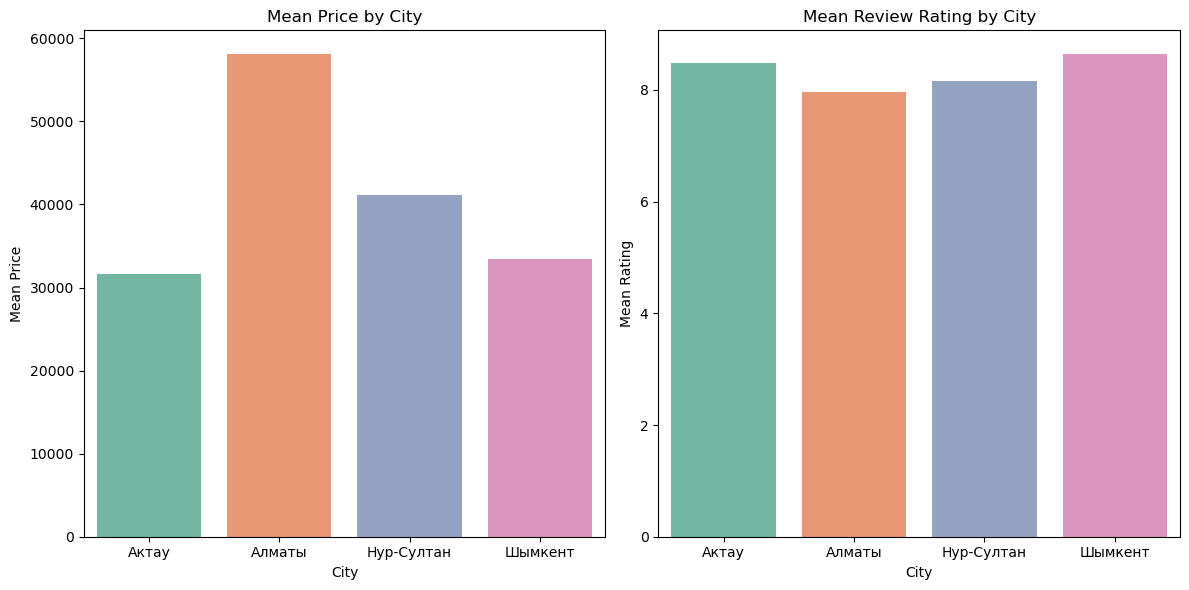

In [22]:
city_means = data.groupby('city').agg({'price': 'mean', 'review': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=city_means, x='city', y='price', palette='Set2')
plt.title('Mean Price by City')
plt.xlabel('City')
plt.ylabel('Mean Price')

plt.subplot(1, 2, 2)
sns.barplot(data=city_means, x='city', y='review', palette='Set2')
plt.title('Mean Review Rating by City')
plt.xlabel('City')
plt.ylabel('Mean Rating')

plt.tight_layout()
plt.show()

### How does the relationship between prices and ratings change for different types of rooms?

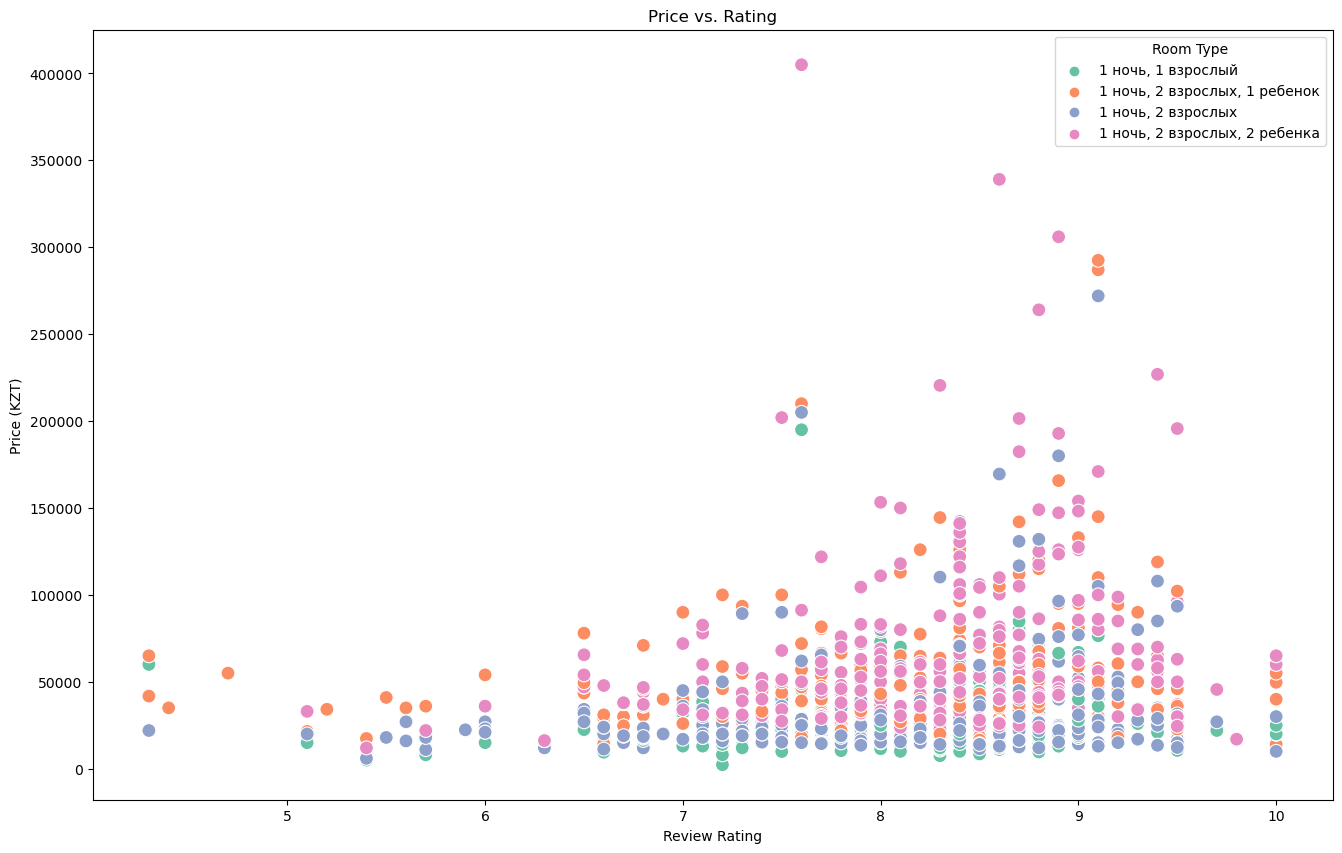

In [80]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=data, x='review', y='price', hue='type of room', palette='Set2', s=100)
plt.title('Price vs. Rating')
plt.xlabel('Review Rating')
plt.ylabel('Price (KZT)')
plt.legend(title='Room Type')
plt.show()

### How does the relationship between prices and ratings change for different cities of Kazakhstan?

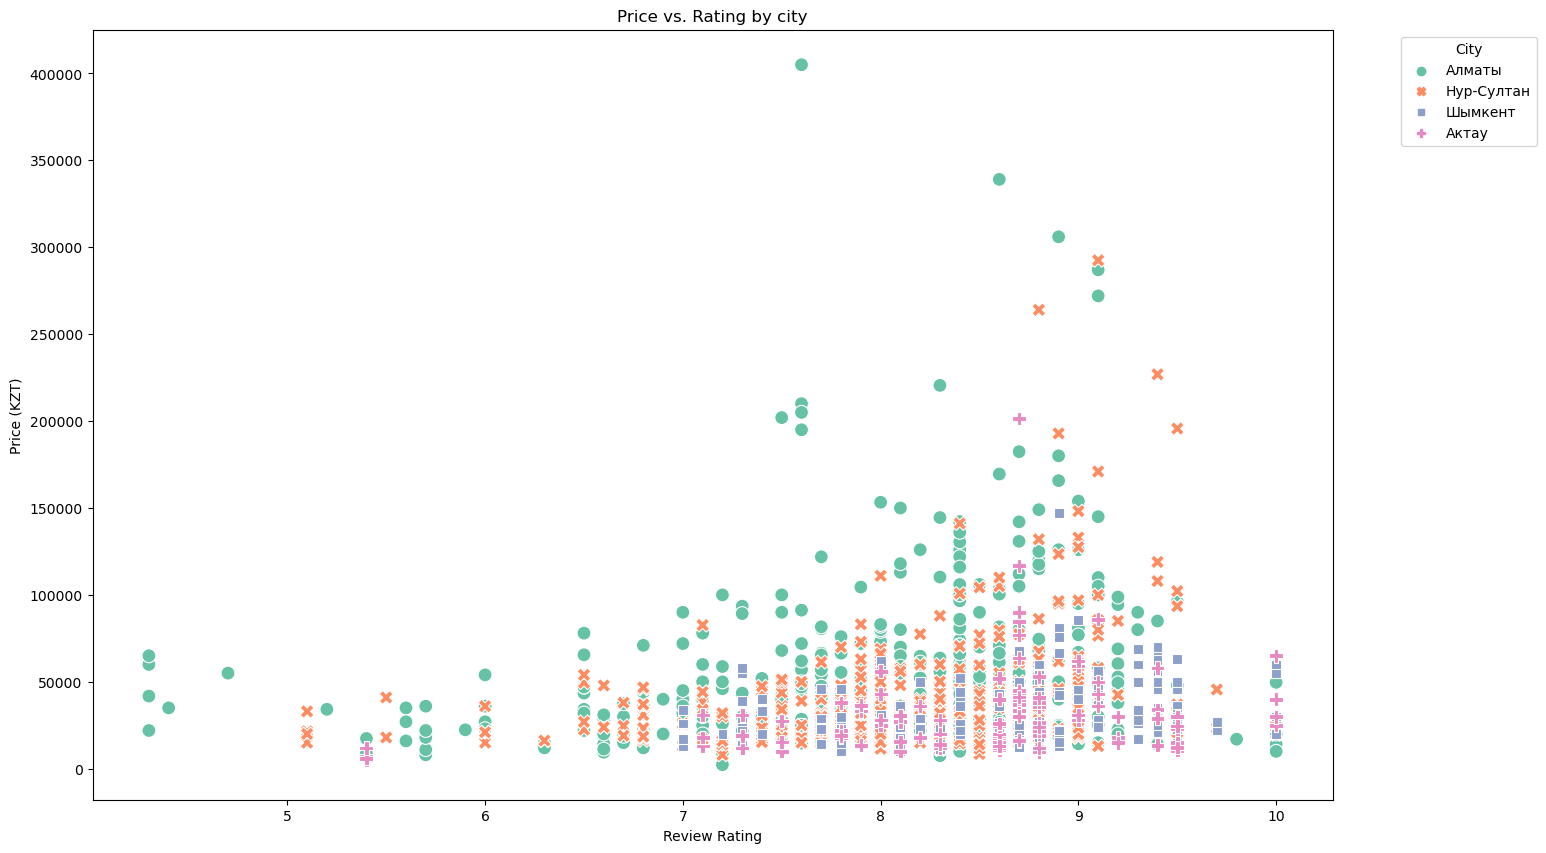

In [79]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=data, x='review', y='price', hue='city', style='city', palette='Set2', s=100)
plt.title('Price vs. Rating by city')
plt.xlabel('Review Rating')
plt.ylabel('Price (KZT)')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### How does a hotel's rating change depending on its location in relation to the city center?

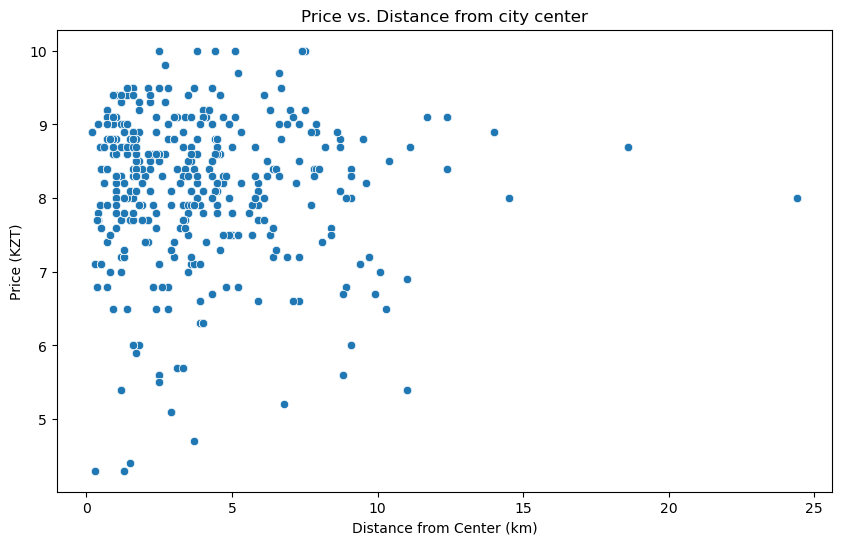

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='review', data=data)

plt.title("Price vs. Distance from city center")
plt.xlabel("Distance from Center (km)")
plt.ylabel("Price (KZT)")

plt.show()

### How does the relationship between price and rating change for different types of taxes?

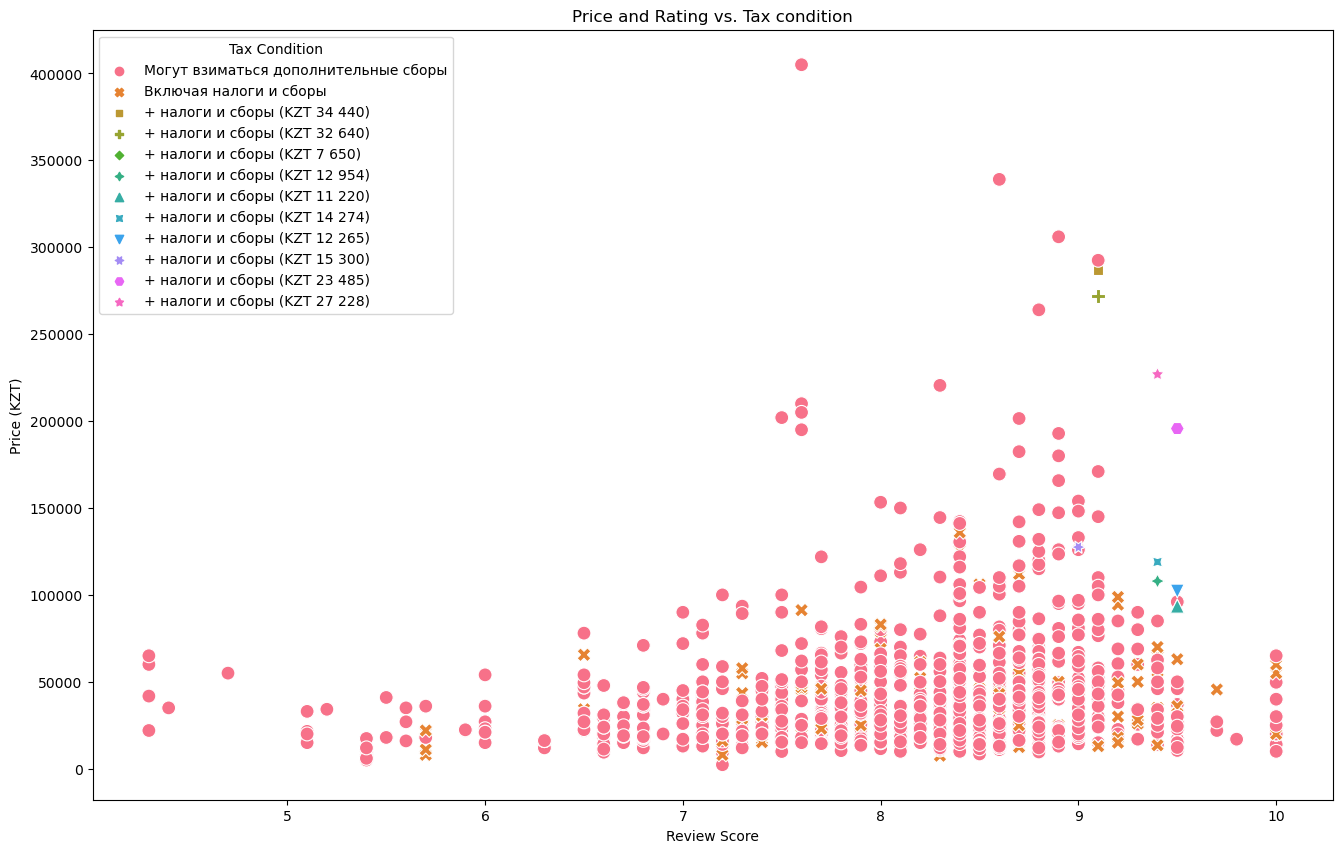

In [81]:
data['price'] = pd.to_numeric(df['price'], errors='coerce')
data['review'] = pd.to_numeric(df['review'], errors='coerce')

plt.figure(figsize=(16, 10))
sns.scatterplot(x='review', y='price', hue='taxes', style='taxes', data=df, s=100)

plt.title("Price and Rating vs. Tax condition")
plt.xlabel("Review Score")
plt.ylabel("Price (KZT)")
plt.legend(title="Tax Condition", loc='upper left')

plt.show()

### What types of accommodation are most common in different cities?

In [83]:
top_conditions = (
    df.groupby('city')['accomodation condition']
    .value_counts()
    .groupby(level=0)
    .head(3)
    .reset_index(name='count')
)

top_conditions

,city,accomodation condition,count
0,Актау,Стандартный двухместный номер с 1 кроватью,18
1,Актау,Стандартный номер с кроватью размера «king-size»,9
2,Актау,Двухместный номер с 1 кроватью,7
3,Алматы,Стандартный двухместный номер с 1 кроватью,54
4,Алматы,Двухместный номер с 1 кроватью,48
5,Алматы,Стандартный двухместный номер с 1 кроватью или...,31
6,Нур-Султан,Стандартный двухместный номер с 1 кроватью,50
7,Нур-Султан,Двухместный номер с 1 кроватью,37
8,Нур-Султан,Двухместный номер с 1 кроватью и собственной в...,22
9,Шымкент,Двухместный номер с 1 кроватью,34
